<a href="https://colab.research.google.com/github/jadamshell/streamlit-example/blob/master/MDWP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

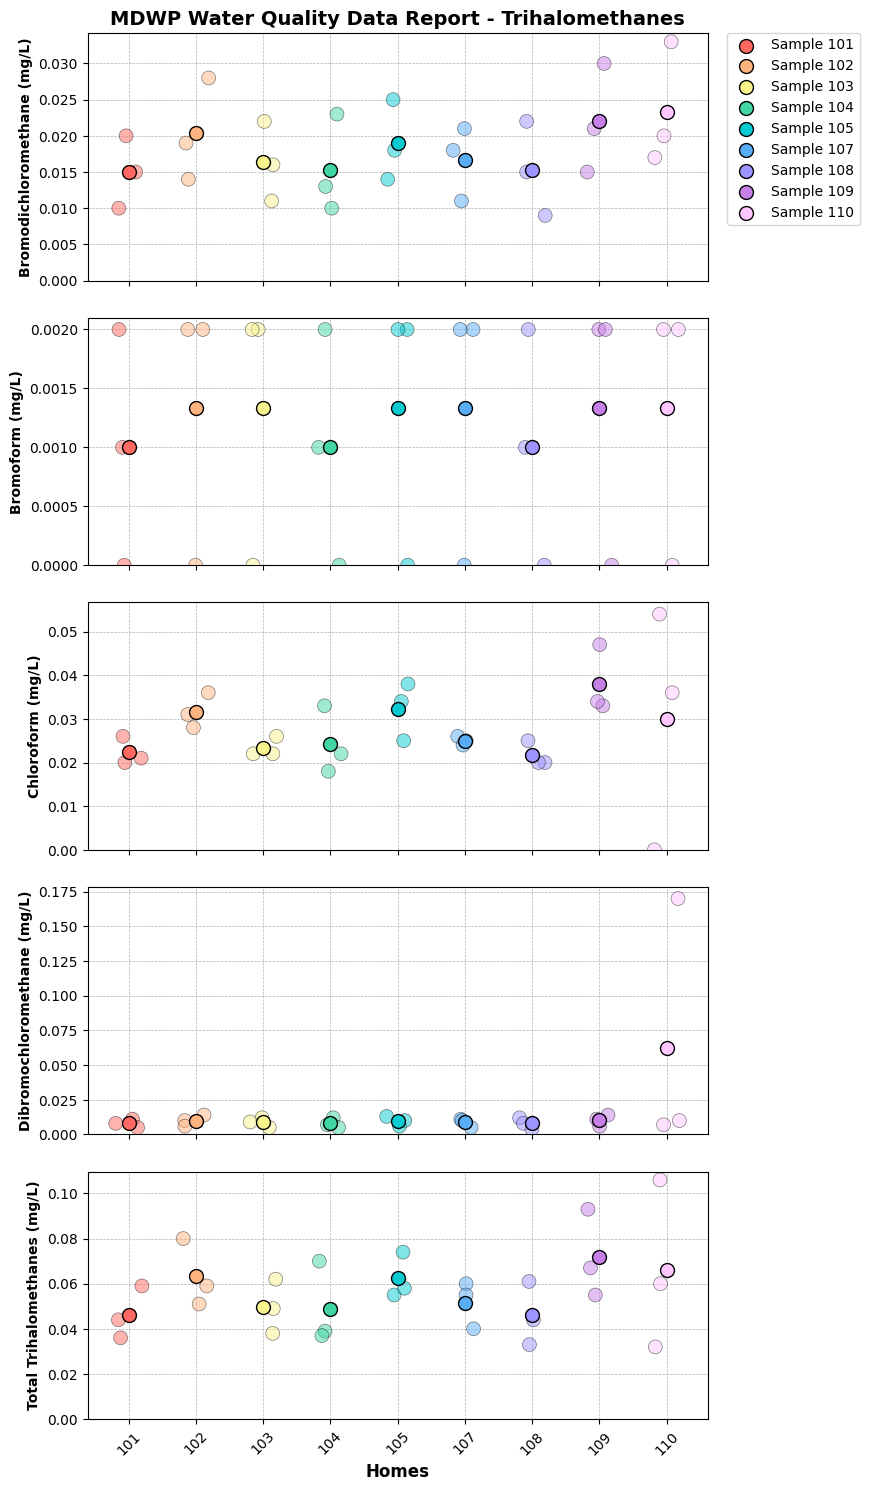

<IPython.core.display.Javascript object>


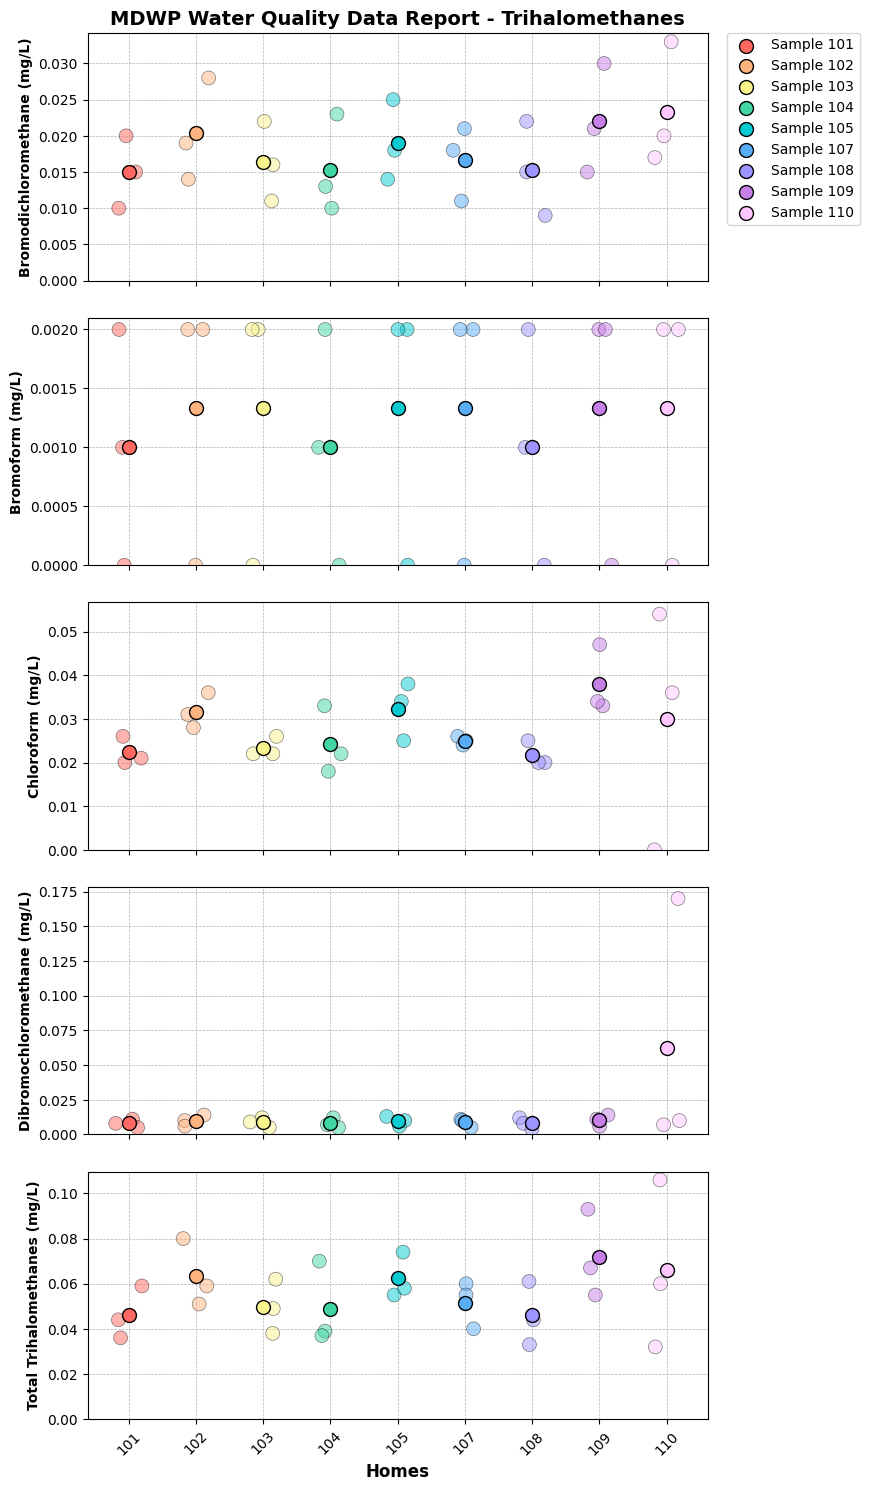

FileUpload(value={}, accept='.csv', description='Upload .csv')

Button(description='Save to HTML', style=ButtonStyle())

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import ipywidgets as widgets
from IPython.display import display, HTML
from IPython.display import display, Javascript, FileLink
import io
import base64
import os

# Create sample data frames with mock data for bromodichloromethane and empty data for others
sample_ids = ['Sample 101', 'Sample 102', 'Sample 103', 'Sample 104', 'Sample 105', 'Sample 107', 'Sample 108', 'Sample 109', 'Sample 110']
samples_per_id = 3


empty_sample_data = {sample_id: [None] * samples_per_id for sample_id in sample_ids}
bromodichloromethane_sample_data = {
    'Sample 101': [0.02, 0.015, 0.01],
    'Sample 102': [0.028, 0.019, 0.014],
    'Sample 103': [0.022, 0.016, 0.011],
    'Sample 104': [0.023, 0.013, 0.01],
    'Sample 105': [0.025, 0.018, 0.014],
    'Sample 107': [0.021, 0.018, 0.011],
    'Sample 108': [0.022, 0.015, 0.009],
    'Sample 109': [0.03, 0.021, 0.015],
    'Sample 110': [0.033, 0.02, 0.017]
}

bromoform_sample_data = {
    'Sample 101': [0.002, 0.001, 0],
    'Sample 102': [0.002, 0.002, 0],
    'Sample 103': [0.002, 0.002, 0],
    'Sample 104': [0.002, 0.001, 0],
    'Sample 105': [0.002, 0.002, 0],
    'Sample 107': [0.002, 0.002, 0],
    'Sample 108': [0.002, 0.001, 0],
    'Sample 109': [0.002, 0.002, 0],
    'Sample 110': [0.002, 0.002, 0]
}

chloroform_sample_data = {
    'Sample 101': [0.026, 0.02, 0.021],
    'Sample 102': [0.036, 0.028, 0.031],
    'Sample 103': [0.026, 0.022, 0.022],
    'Sample 104': [0.033, 0.018, 0.022],
    'Sample 105': [0.034, 0.025, 0.038],
    'Sample 107': [0.026, 0.025, 0.024],
    'Sample 108': [0.025, 0.02, 0.02],
    'Sample 109': [0.047, 0.033, 0.034],
    'Sample 110': [0.054, 0, 0.036]
}
dibromochloromethane_sample_data = {
    'Sample 101': [0.011, 0.008, 0.005],
    'Sample 102': [0.014, 0.01, 0.006],
    'Sample 103': [0.012, 0.009, 0.005],
    'Sample 104': [0.012, 0.007, 0.005],
    'Sample 105': [0.013, 0.01, 0.006],
    'Sample 107': [0.011, 0.01, 0.005],
    'Sample 108': [0.012, 0.008, 0.004],
    'Sample 109': [0.014, 0.011, 0.006],
    'Sample 110': [0.17, 0.01, 0.007]
}

total_trihalomethanes_sample_data = {
    'Sample 101': [0.059, 0.044, 0.036],
    'Sample 102': [0.08, 0.059, 0.051],
    'Sample 103': [0.062, 0.049, 0.038],
    'Sample 104': [0.07, 0.039, 0.037],
    'Sample 105': [0.074, 0.055, 0.058],
    'Sample 107': [0.06, 0.055, 0.04],
    'Sample 108': [0.061, 0.044, 0.033],
    'Sample 109': [0.093, 0.067, 0.055],
    'Sample 110': [0.106, 0.032, 0.06]
}

total_trihalomethanes_df = pd.DataFrame(total_trihalomethanes_sample_data)

bromodichloromethane_df = pd.DataFrame(bromodichloromethane_sample_data)
bromoform_df = pd.DataFrame(bromoform_sample_data)
chloroform_df = pd.DataFrame(chloroform_sample_data)
dibromochloromethane_df = pd.DataFrame(dibromochloromethane_sample_data)
total_trihalomethanes_df = pd.DataFrame(total_trihalomethanes_sample_data)

# Calculate moving averages
bromodichloromethane_ma = bromodichloromethane_df.rolling(3).mean()
bromoform_ma = bromoform_df.rolling(3).mean()
chloroform_ma = chloroform_df.rolling(3).mean()
dibromochloromethane_ma = dibromochloromethane_df.rolling(3).mean()
total_trihalomethanes_ma = total_trihalomethanes_df.rolling(3).mean()

# Set up color palette
colors = ['#ff6961', '#ffb480', '#f8f38d', '#42d6a4', '#08cad1', '#59adf6', '#9d94ff', '#c780e8', '#ffc6ff']

# Create the plot
fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(nrows=5, ncols=1, sharex=True, figsize=(8, 18))

# Function to plot each THM
def plot_thm(ax, df, ma, ylabel):
    sns.stripplot(data=df, jitter=0.2, size=10, linewidth=0.5, edgecolor='black', palette=colors, alpha=0.5, ax=ax)
    for i, col in enumerate(ma):
        ax.scatter(i, ma[col].mean(), color=colors[i], s=100, linewidth=1, edgecolor='black', zorder=10)
    ax.set_ylabel(ylabel, fontdict={'fontsize': 10, 'fontweight': 'bold'})
    ax.set_xticks(range(len(sample_ids)))

    # Remove the word 'Sample' from each sample ID
    cleaned_sample_ids = [s.replace('Sample ', '') for s in sample_ids]
    
    ax.set_xticklabels(cleaned_sample_ids, rotation=45)
    ax.grid(axis='both', linestyle='--', linewidth=0.5)
    ax.set_ylim(0, ax.get_ylim()[1])

# Call the plot_thm function for each THM
plot_thm(ax1, bromodichloromethane_df, bromodichloromethane_ma, 'Bromodichloromethane (mg/L)')
plot_thm(ax2, bromoform_df, bromoform_ma, 'Bromoform (mg/L)')
plot_thm(ax3, chloroform_df, chloroform_ma, 'Chloroform (mg/L)')
plot_thm(ax4, dibromochloromethane_df, dibromochloromethane_ma, 'Dibromochloromethane (mg/L)')
plot_thm(ax5, total_trihalomethanes_df, total_trihalomethanes_ma, 'Total Trihalomethanes (mg/L)')

# Add X-axis title
ax5.set_xlabel('Homes', fontdict={'fontsize': 12, 'fontweight': 'bold'})

# Set title for the first plot
ax1.set_title('MDWP Water Quality Data Report - Trihalomethanes', fontdict={'fontsize': 14, 'fontweight': 'bold'})

# Add legend to the first plot
legend_labels = list(bromodichloromethane_sample_data.keys())
legend_handles = [ax1.scatter([], [], color=colors[i], s=100, linewidth=1, edgecolor='black') for i in range(len(colors))]
legend_handles.append(ax1.plot([], [], color='red', linestyle='-', linewidth=1)[0])
plt.legend(legend_handles, legend_labels, bbox_to_anchor=(1.02, 5.63), loc='upper left')

# Save plot as png
plt.savefig('water_quality_report.png', bbox_inches='tight')

# Show all plots
plt.subplots_adjust(wspace=0.8, hspace=0.15)
plt.show()

# Print to PNG and Save to HTML buttons
def print_to_png(button):
    fig.savefig('tri_halomethanes.png', dpi=300)

def save_to_html(button):
    with open('tri_halomethanes.html', 'w') as f:
        f.write(total_trihalomethanes_df.to_html(classes='table table-striped', index=False, border=0))

print_png_button = widgets.Button(description='Print to PNG')
print_png_button.on_click(print_to_png)
save_html_button = widgets.Button(description='Save to HTML')
save_html_button.on_click(save_to_html)


# Function to update the graph
def update_graph(change):
    uploaded_file = change['new']
    if uploaded_file:
        content = io.StringIO(uploaded_file.decode('utf-8'))
        new_data = pd.read_csv(content, index_col=0)

        # Update the dataframes
        bromodichloromethane_df.update(new_data.loc['Bromodichloro'])
        bromoform_df.update(new_data.loc['Bromoform'])
        chloroform_df.update(new_data.loc['Chloroform'])
        dibromochloromethane_df.update(new_data.loc['Dibromochloro'])
        total_trihalomethanes_df.update(new_data.loc['Total THMs'])

        # Update the moving averages
        bromodichloromethane_ma.update(bromodichloromethane_df.rolling(3).mean())
        bromoform_ma.update(bromoform_df.rolling(3).mean())
        chloroform_ma.update(chloroform_df.rolling(3).mean())
        dibromochloromethane_ma.update(dibromochloromethane_df.rolling(3).mean())
        total_trihalomethanes_ma.update(total_trihalomethanes_df.rolling(3).mean())

        # Update the plots
        ax1.clear()
        ax2.clear()
        ax3.clear()
        ax4.clear()
        ax5.clear()
        plot_thm(ax1, bromodichloromethane_df, bromodichloromethane_ma, 'Bromodichloromethane (mg/L)')
        plot_thm(ax2, bromoform_df, bromoform_ma, 'Bromoform (mg/L)')
        plot_thm(ax3, chloroform_df, chloroform_ma, 'Chloroform (mg/L)')
        plot_thm(ax4, dibromochloromethane_df, dibromochloromethane_ma, 'Dibromochloromethane (mg/L)')
        plot_thm(ax5, total_trihalomethanes_df, total_trihalomethanes_ma, 'Total Trihalomethanes (mg/L)')

        # Redraw the canvas
        fig.canvas.draw()

#Function to plot THM
def plot_thm(ax, data, ma_data, title):
  ax.plot(data, marker='o', label='Raw Data')
  ax.plot(ma_data, marker='o', linestyle='--', label='3-Point Moving Average')
  ax.set_title(title)
  ax.set_xlabel('Sample ID')
  ax.set_ylabel('Concentration (mg/L)')
  ax.legend()

def save_png_to_downloads():
    buf = io.BytesIO()
    fig.savefig(buf, format='png', bbox_inches='tight')
    buf.seek(0)
    return buf

def save_png_button():
    buf = save_png_to_downloads()
    img_b64 = base64.b64encode(buf.getvalue()).decode('utf-8')
    button = f"""
    <a download="graph.png" href="data:image/png;base64,{img_b64}" id="save_png">
        <button>Save as PNG</button>
    </a>
    """
    return display(Javascript(f"document.getElementById('save_png').click()"), HTML(button))

save_png_button()

#Create the file uploader widget and add the observer
file_uploader = widgets.FileUpload(
accept='.csv',
multiple=False,
description='Upload .csv'
)

file_uploader.observe(update_graph, names='value')

# Function to create a download link for CSV files
def create_download_link(filename, title):
    data = pd.concat([bromodichloromethane_df, bromoform_df, chloroform_df, dibromochloromethane_df, total_trihalomethanes_df], keys=['Bromodichloro', 'Bromoform', 'Chloroform', 'Dibromochloro', 'Total THMs'])
    data.to_csv(filename)
    with open(filename, "rb") as f:
        b64 = base64.b64encode(f.read()).decode()
    os.remove(filename)
    link = f'<a href="data:application/octet-stream;base64,{b64}" download="{filename}">{title}</a>'
    return link

#Display the file uploader widget
display(file_uploader)

# Display widgets
display(save_html_button)

# Display the download link
display(HTML(create_download_link("water_quality_data.csv", "Download current data as .csv")))